In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"rashmipaboda","key":"3371eca1ffe11675a16e7bdd34fd48ae"}'}

In [ ]:
!mkdir -p ~/.kaggle #making a directory
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 11.4MB/s]


In [ ]:
import pandas as pd #kinda like excel sheet for python
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')

In [ ]:
df.head() ##gives a idea about what we work on giving the first 5 rows

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
df.isnull().sum() ##how much is null in the table columns

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
numeric_cols = df.select_dtypes(include='number').columns     ##fill up the null values so this doesnt suffer when training
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean())
## will find all numeric columns fill those with average values


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,90
restecg,2
thalch,0


In [ ]:
import matplotlib.pyplot as plt ##simple graphing
import seaborn as sns ## more fancy

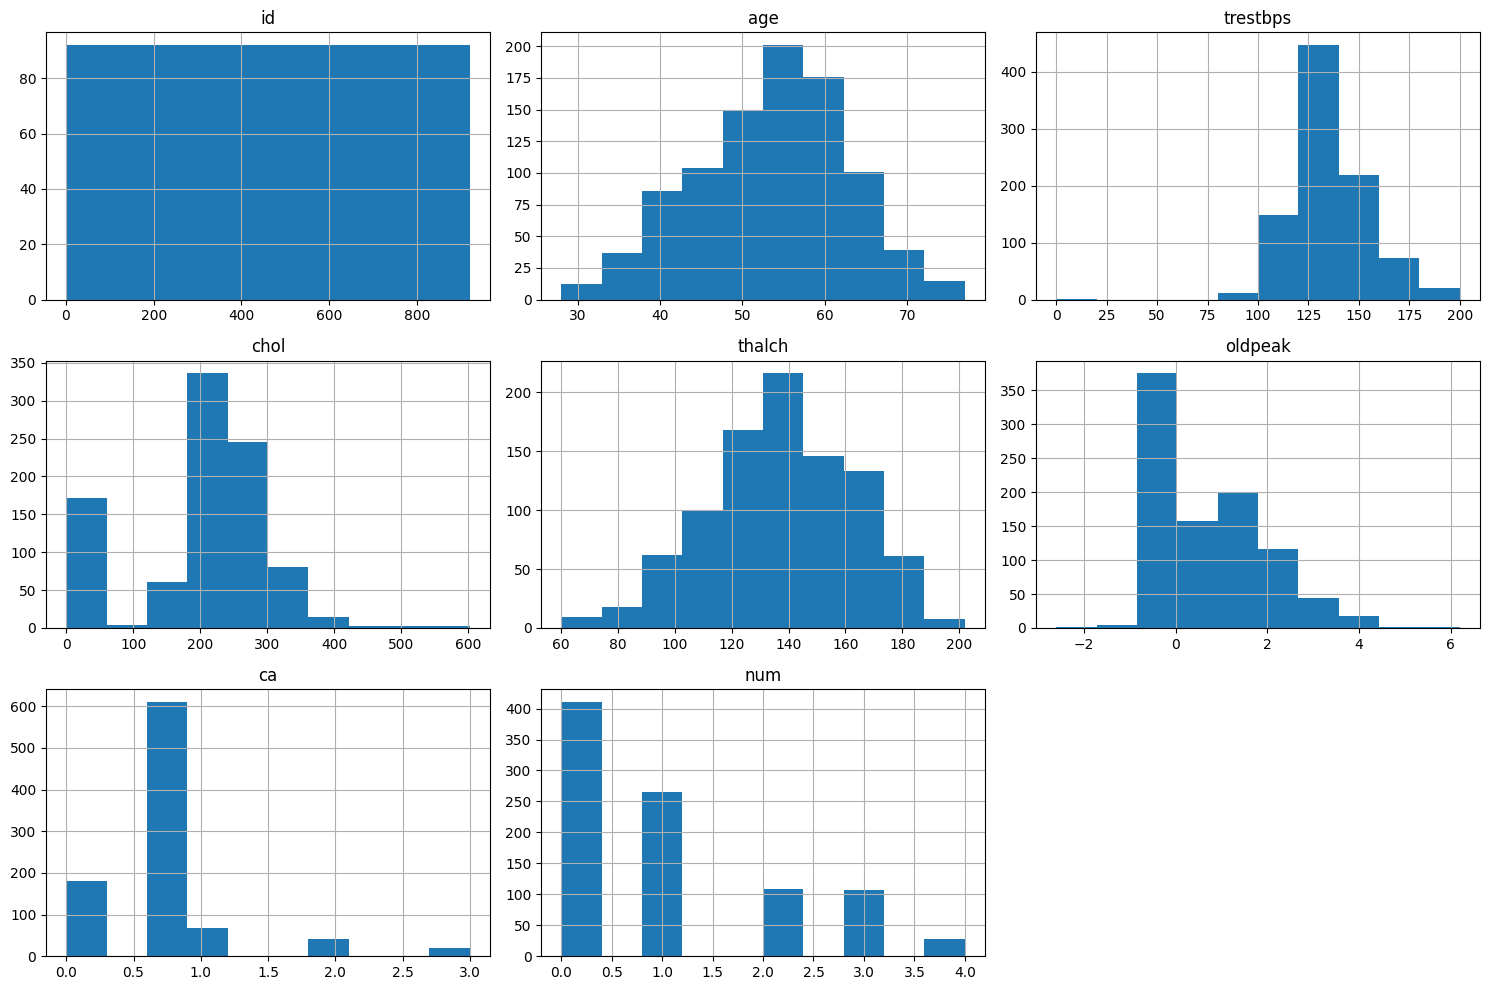

In [ ]:
df[numeric_cols].hist(figsize=(15,10)) ##histogram for each column
plt.tight_layout() ##adjust plot spacing
plt.show() #present everything

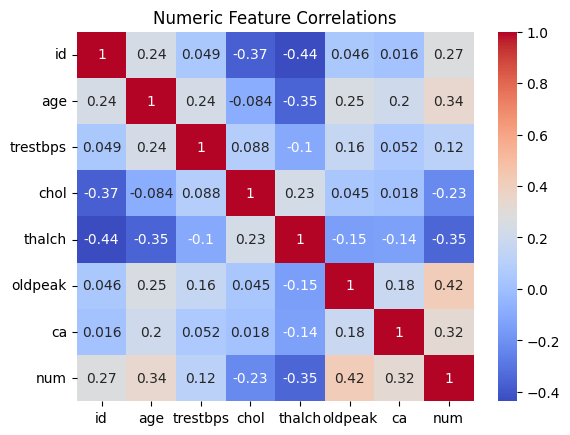

In [ ]:
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()

In [ ]:
cat_cols=df.select_dtypes(include='object').columns.tolist()
##Picks out columns with type object (usually strings, like "male", "female", "yes", "no", etc.).
##Stores their names in a Python list called cat_cols.
if 'num' in cat_cols:
  ###Checks if the column "num" (your target column = heart disease present or not) is mistakenly considered categorical.
  cat_cols.remove('num')

In [ ]:
X=df.drop('num',axis=1)
y=(df['num']>0).astype(int) #0: no diseaase, 1: disease present

In [ ]:
X=pd.get_dummies(X,columns=cat_cols)
print("final feature columns:",X.columns)

final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


# **day 03**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

new value=(x-mean)/standard deviation

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression #its about classification

In [ ]:
lr_model=LogisticRegression() #giving admission to a new student(just a example)
lr_model.fit(X_train_scaled, y_train) #target training and input training data
#x trained scaled- scaled data #
#y_train= if the input is correct

LogisticRegression()

model evaluation

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
y_pred_lr=lr_model.predict(X_test_scaled)
print("logistic regression accuracy:",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

logistic regression accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



accuracy score - 75 to 98 is very good.

# **day 4 : random forest and feature importance**

In [ ]:
from sklearn.metrics import confusion_matrix

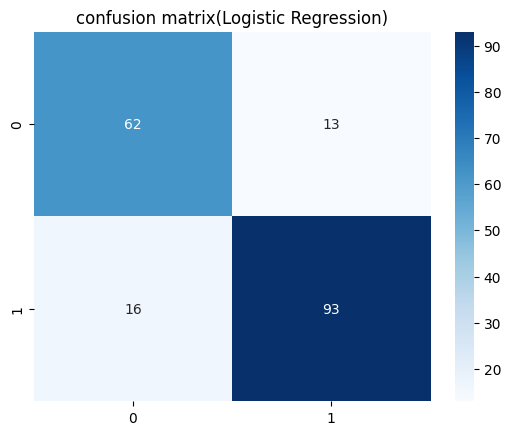

In [ ]:
cm = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('confusion matrix(Logistic Regression)')
plt.show()

Top-left (62) → True Negatives (TN)

Model correctly predicted 0 when the actual label was 0.


---
Top-right (13) → False Positives (FP)

Model predicted 1, but the actual label was 0 (wrong).


---
Bottom-left (16) → False Negatives (FN)

Model predicted 0, but the actual label was 1 (wrong).


---
Bottom-right (93) → True Positives (TP)

Model correctly predicted 1 when the actual label was 1.

**random forest**

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Drop 'id' from X
X = X.drop(columns=['id'], errors='ignore')  # Safely drop if already gone
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale your data (assuming you have a scaler defined, e.g., from sklearn.preprocessing)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

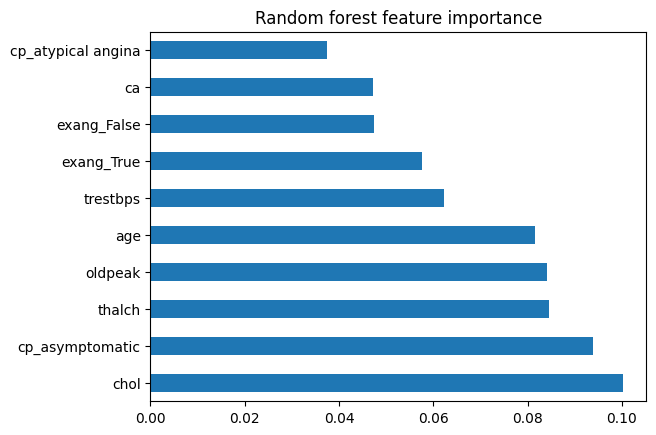

In [133]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random forest feature importance')
plt.show()

In [134]:
print("random forest accuracy:",accuracy_score(y_test,y_pred_rf))

random forest accuracy: 0.8858695652173914


Save the **model**

In [130]:
import joblib
joblib.dump(rf_model, 'heart_rf_moel_pkl')
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

In [131]:
sample= X.head(1)
sample.to_csv('heart_user_template.csv',index=False)
print("user template saved as 'heart_user_template.csv'")

user template saved as 'heart_user_template.csv'


# day 05 - user upload ,save models and prediction

In [132]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [135]:
# Provide a sample input template for users
sample = X.head(1)
sample.to_csv('heart_user_template.csv', index=False)
print("User template saved as 'heart_user_template.csv'")


User template saved as 'heart_user_template.csv'


In [136]:
from google.colab import files

uploaded = files.upload()  # User uploads their patient data as CSV (same columns as sample template)

Saving heart_dataset.csv to heart_dataset (1).csv


In [137]:
import joblib
import pandas as pd

user_df = pd.read_csv('heart_dataset.csv')

# Get column lists from training dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

# Drop columns not in user_df to avoid errors
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

# Fill missing values in numeric columns with training set mean
user_df[numeric_cols] = user_df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in categorical columns with 'Unknown'
for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')

# Convert boolean columns to int
for col in bool_cols:
    user_df[col] = user_df[col].astype(int)

# One-hot encode categorical columns
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

# Align columns with training features X.columns
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

# Scale data
scaler = joblib.load('heart_scaler.pkl')
user_scaled = scaler.transform(user_df_encoded)

# Predict
model = joblib.load('heart_rf_model.pkl')
preds = model.predict(user_scaled)
user_df['Heart_Disease_Prediction'] = preds

print(user_df)


   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           

In [138]:
import joblib
model = joblib.load('heart_rf_model.pkl')
print(len(model.feature_importances_))

29
